Objetivo do projeto: Classificar se uma máquina precisa ou não de manutenção

In [1]:
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import tree

Criando a base de dados

In [2]:
data = pd.DataFrame({
    'idade': [2,6,1,4,3,5],
    'tempo': [50,200,20,150,100,180],
    'falhas': [0,2,0,1,3,2],
    'classif': ['necessita','necessita','necessita','não necessita','não necessita','não necessita']
})

Dividir os dados em treino e teste

Acurácia: 0.5
Matrix: [[1 1]
 [0 0]]
Precisão: 1.0


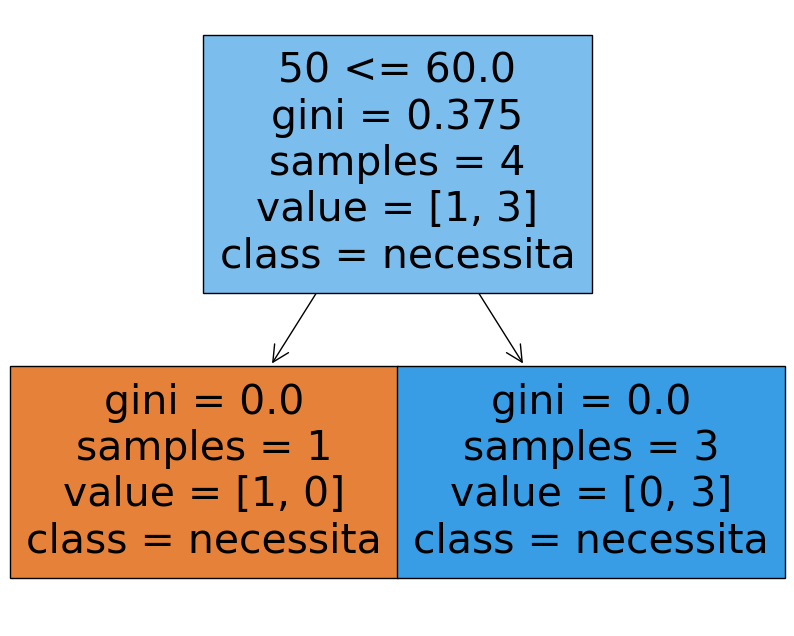

In [3]:
x=np.array(data['tempo']) # pega a coluna tempo do dataframe
y=np.array(data['classif']) # pega a coluna de classificação do dataframe
x_treino,x_teste,y_treino,y_teste = train_test_split(x.reshape(-1,1),y.reshape(-1,1),
                                                     test_size=0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(x_treino,y_treino)
prev = model.predict(x_teste)
acurracy = accuracy_score(y_teste,prev)
precisao = precision_score(y_teste,prev,pos_label='necessita')
matrix = confusion_matrix(y_teste,prev)
print(f"Acurácia: {acurracy}")
print(f"Matrix: {matrix}")
print(f"Precisão: {precisao}")
fig = plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=x.tolist(),class_names=y.tolist(),filled=True)
plt.show()

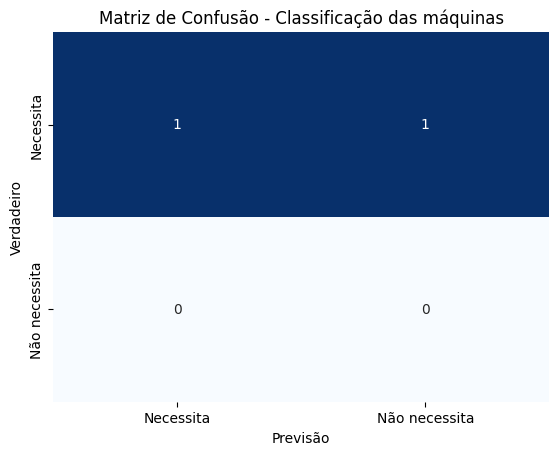

In [4]:
sns.heatmap(matrix,annot= True,fmt='d',cmap='Blues',cbar=False,xticklabels=['Necessita','Não necessita'],yticklabels=['Necessita','Não necessita'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação das máquinas')
plt.show()